Importando Dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('Customer-Churn.csv')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [5]:
#Modificação das variáveis categóricas em numéricas.
#Forma manual

traducao_dic = {'Sim' : 1,
                'Nao' : 0}

dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
# transformação pelo get_dummies

dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis = 1))

#junção dos dados transformados com os que já tínhamos

dados_final = pd.concat([dados_modificados, dummie_dados], axis=1)

In [7]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


**Definição Formal**

Informações para Classificação:

X = inputs (dados de entrada - as features)

y = outputs (dados de saída - o classificador)

In [8]:
# para visualizar todas as colunas do dataset
pd.set_option('display.max_columns', 39)

In [9]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


O 'y' é o resultado de uma função desconhecida que a máquina irá aprender com o algoritmo e aplicar aos nossos dados x.

Yi = f(Xi)

In [10]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Conferindo o desbalanceamento dos dados

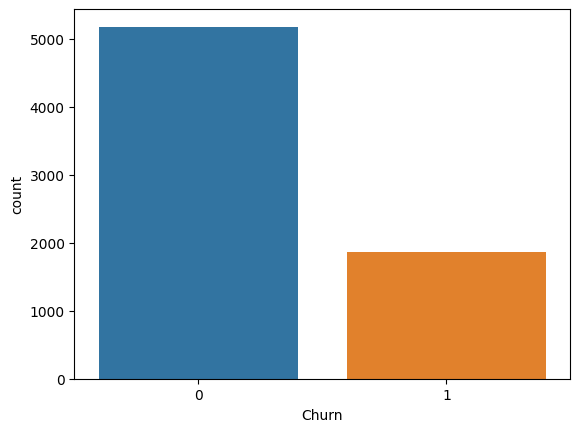

In [11]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Notamos que a nossa variável está desbalanceada. Para realizar o balanceamento dos dados utilizaremos a técnica Oversampling que irá criar novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizadas é a SMOTE. Ela criar observações intermediárias entre os dados que estão próximos.



In [12]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [13]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [14]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


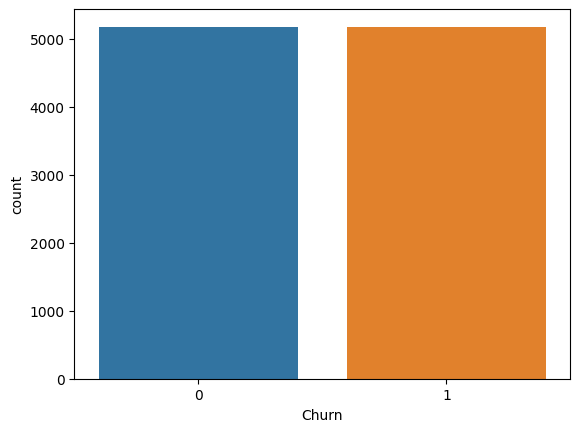

In [15]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

Método baseado na proximidade (KNN)

In [16]:
# Divisão em inputs e outputs

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [17]:
# biblioteca para padronizar os dados

from sklearn.preprocessing import StandardScaler

In [18]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [19]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [20]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

In [21]:
# Calculando a distância euclidiana

import numpy as np

a = Xmaria_normalizado
b = X_normalizado[0]


np.sqrt(np.sum(np.square(a-b)))

9.576596663360199

Implementando o modelo

In [22]:
# biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [23]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

Treino e Teste

In [24]:
# biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos

knn = KNeighborsClassifier(metric='euclidean')

In [26]:
# treinando o modelo com os dados do treino

knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [27]:
# testando o modelo com os dados de teste

predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

Treinamento e Teste

In [28]:
X_treino

array([[-0.79024667, -0.52771004, -3.06083934, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ]])

In [29]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [30]:
# calculo a mediana

print(np.median(X_treino))
print(np.mean(X_treino))

-0.4461759755508453
0.0006957851173553281


In [31]:
# criando o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

#criamos o modelo
bnb = BernoulliNB(binarize=0.0006957851173553281)

In [32]:
bnb.fit(X_treino, y_treino)

# houve um erro reportando ao utilizar a mediana (que foi proposto em aula). Logo utilizei outra medida de tendência central e o código rodou tranquilamente.

BernoulliNB(binarize=0.0006957851173553281)

In [33]:
predito_BNb = bnb.predict(X_teste)
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

Implementando o Modelo

In [34]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [35]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01986065, 0.01886452,
       0.1627932 , 0.22212421, 0.00939177, 0.00344576, 0.01039829,
       0.0019815 , 0.03128648, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01299062, 0.00368329, 0.02047256,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03622159, 0.16358635, 0.07445054, 0.01758995,
       0.02117825, 0.02183557, 0.01975766])

In [38]:
predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

Validação dos Modelos

In [39]:
#matriz de confusão

from sklearn.metrics import confusion_matrix

In [40]:
print(confusion_matrix(y_teste, predito_knn))

[[1242  327]
 [ 248 1288]]


In [41]:
print(confusion_matrix(y_teste, predito_BNb))

[[1091  478]
 [ 241 1295]]


In [42]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 275 1261]]


Acurácia

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
#Modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [45]:
#modelo Bernoulli de Naive Bayes
print(accuracy_score(y_teste, predito_BNb))

0.768438003220612


In [46]:
#modelo Árvore de Decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.808695652173913


Precisão

In [47]:
from sklearn.metrics import precision_score

In [48]:
#Modelo KNN
print(precision_score(y_teste, predito_knn))

0.7975232198142415


In [49]:
#modelo Bernoulli de Naive Bayes
print(precision_score(y_teste, predito_BNb))

0.730400451212634


In [50]:
#modelo Árvore de Decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7981012658227848


Recall

In [51]:
from sklearn.metrics import recall_score

In [52]:
#Modelo KNN
print(recall_score(y_teste, predito_knn))

0.8385416666666666


In [53]:
#modelo Bernoulli de Naive Bayes
print(recall_score(y_teste, predito_BNb))

0.8430989583333334


In [54]:
#modelo Árvore de Decisão
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8209635416666666


Escolhendo o melhor modelo

>>> Precisão!

Depende do problema a ser solucionado. Nesse caso, Churn, precisamos de uma técnica mais generalista.

>>> Modelo Árvore de Decisão

In [56]:
print('Modelo KNN: ',precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ',precision_score(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ',precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.7975232198142415
Modelo Bernoulli de Naive Bayes:  0.730400451212634
Modelo Árvore de Decisão:  0.7981012658227848
